In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


La variable target est status

# Exploration de données

In [3]:
df.shape

(215, 15)

In [5]:
df['status'].value_counts(normalize=True)*100

Placed        68.837209
Not Placed    31.162791
Name: status, dtype: float64

<AxesSubplot:>

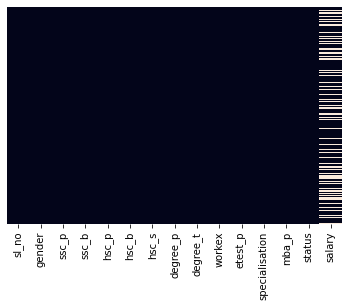

In [6]:
sns.heatmap(df.isnull() , yticklabels=False , cbar = False)

In [7]:
(df.isna().sum() / df.shape[0]).sort_values()

sl_no             0.000000
gender            0.000000
ssc_p             0.000000
ssc_b             0.000000
hsc_p             0.000000
hsc_b             0.000000
hsc_s             0.000000
degree_p          0.000000
degree_t          0.000000
workex            0.000000
etest_p           0.000000
specialisation    0.000000
mba_p             0.000000
status            0.000000
salary            0.311628
dtype: float64

In [9]:
# Traitement des valeurs manquantes
df['salary'] = df['salary'].fillna(df['salary'].median())

In [10]:
(df.isna().sum() / df.shape[0]).sort_values()

sl_no             0.0
gender            0.0
ssc_p             0.0
ssc_b             0.0
hsc_p             0.0
hsc_b             0.0
hsc_s             0.0
degree_p          0.0
degree_t          0.0
workex            0.0
etest_p           0.0
specialisation    0.0
mba_p             0.0
status            0.0
salary            0.0
dtype: float64

In [11]:
df.dtypes.value_counts()

object     8
float64    6
int64      1
dtype: int64

In [13]:
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)

len(var_cat)

8

In [14]:
var_num  = []

for col in df.select_dtypes('float'):
    var_num.append(col)
    
for col in df.select_dtypes('int'):
    var_num.append(col)
    
len(var_num)

7

# Analyse Univarié

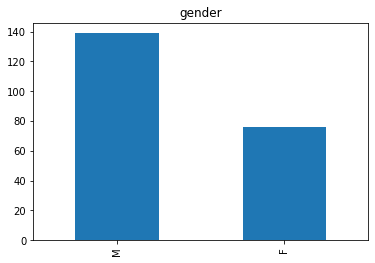

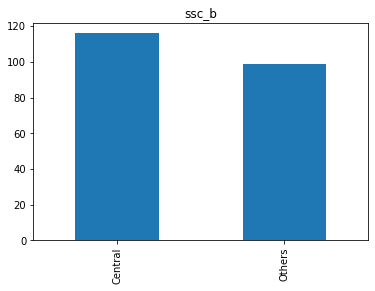

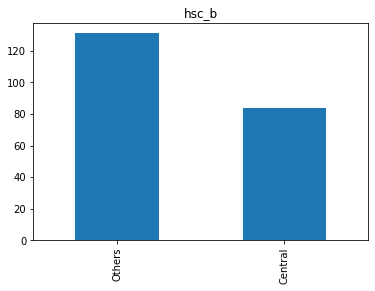

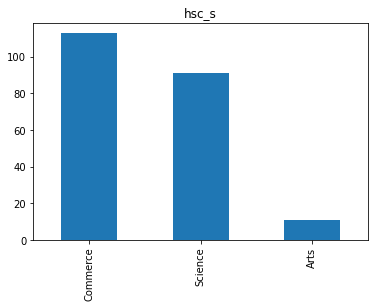

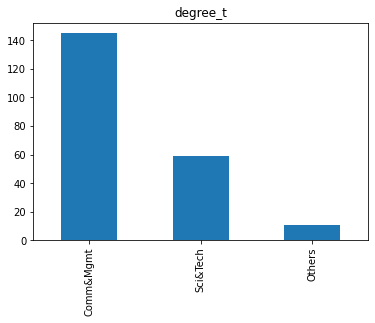

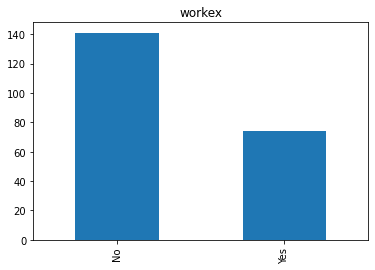

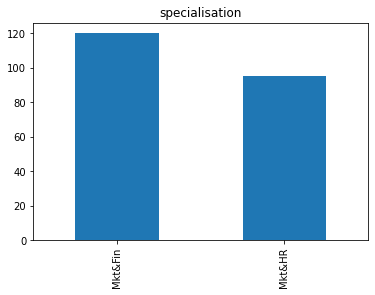

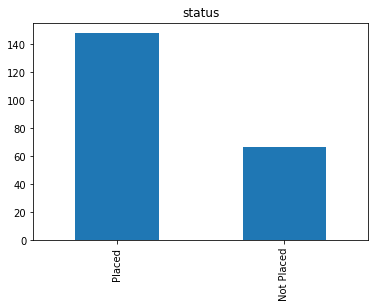

In [15]:
# Visualisation de toute les variables catégoriques

for col in var_cat:
    plt.figure()
    df[col].value_counts().plot.bar()
    plt.title(col)

- Dans notre échantillon , il y'a beaucoup plus d'homme que de femme
- La section dominante est les études en commerce
- La majorité des étudiants n'ont pas d'expérience professionnel
- Il y'a un déséquilibre entre placed et not placed --> il faudra en tenir compte lors de l'élaboration du modéle

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

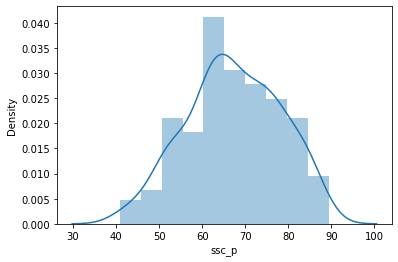

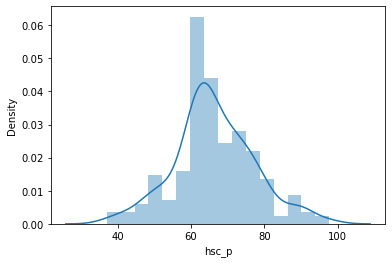

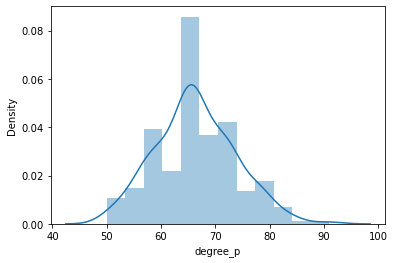

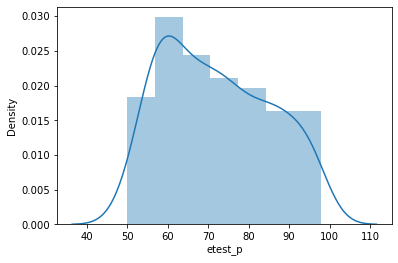

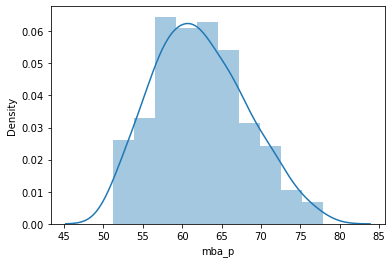

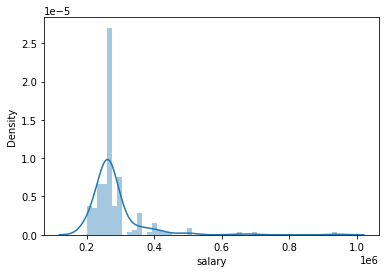

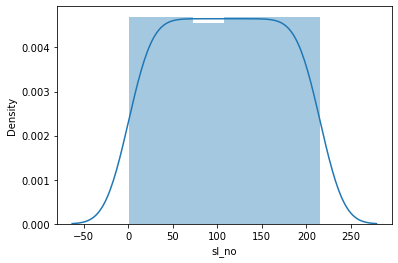

In [16]:
# Visualisation des valeurs numériques
for col in var_num:
    plt.figure()
    sns.distplot(df[col])

- La moyenne des salaires est de 30 000$ 

# Analyse Bivarié

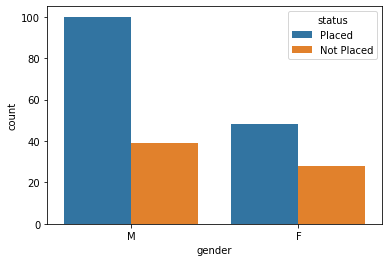

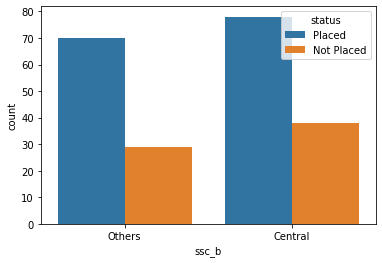

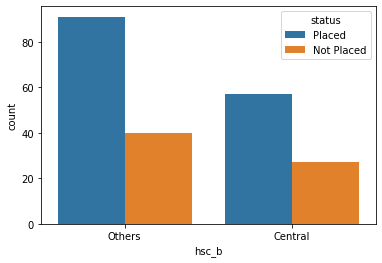

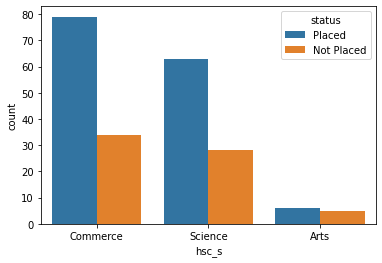

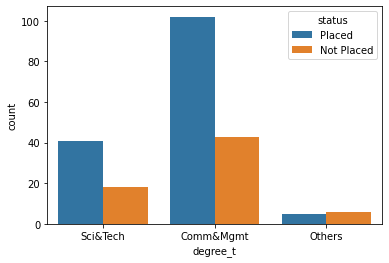

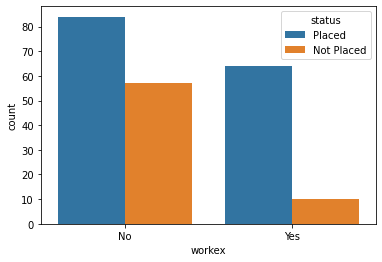

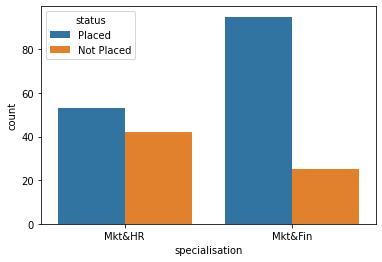

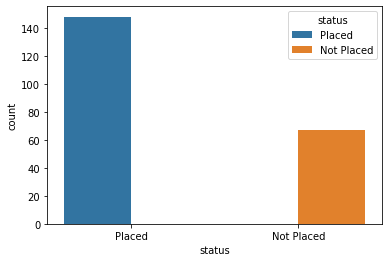

In [17]:
# Visualisation des relations entre les variables catégoriques et la target

for col in var_cat:
    plt.figure()
    sns.countplot(x=col , data=df , hue='status')

- Il y'a plus de chance que la personne soit accepté quand c'est un homme que quand c'est une femme
- Les central et les others (en ssc_b) ont autant de chance l'un que l'autre d'être accepté
- Les central et les others (en hsc_b) ont autant de chance l'un que l'autre d'être accepté
- Les étudiants en Art ont ceux qui ont le moins de chance d'être accepté, les chances des étudiants en Commerce et en science sont équivalente
- Les étudiants ayant une expérience professionnel ont beaucoup plus de chance d'être accepté que ceux qui n'en ont pas
- Les étudiants spécialisé en Marketing et finance ont ceux qui ont le plus de chance de trouver un job
- De maniére général, il y'a plus d'étudiant qui ont obtenue un job que ceux qui n'en ont pas eu 

In [18]:
placed_df = df[df['status'] == 'Placed']
not_placed_df = df[df['status'] == 'Not Placed']

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

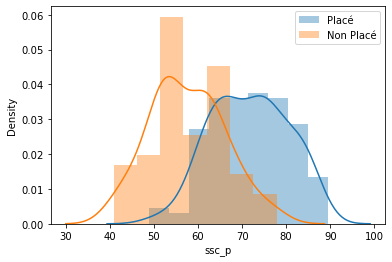

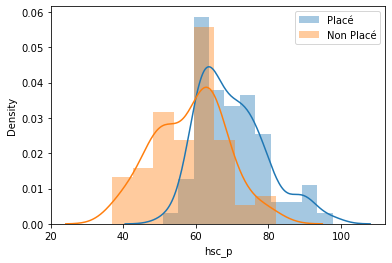

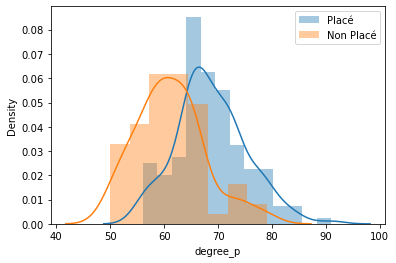

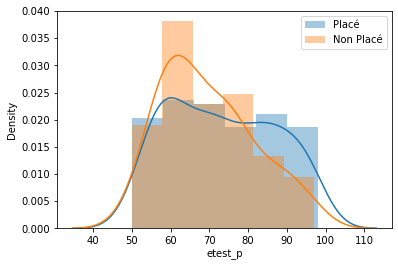

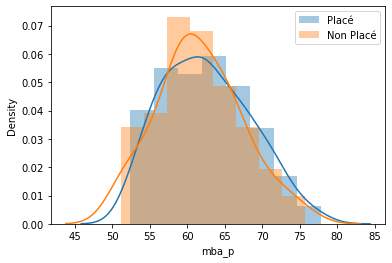

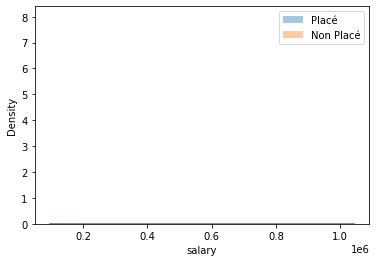

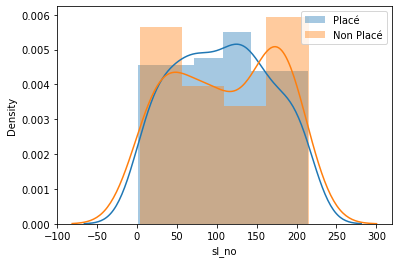

In [20]:
# Visualisation des relations entre les variables continue et la target

for col in var_num:
    plt.figure()
    sns.distplot(placed_df[col] , label='Placé')
    sns.distplot(not_placed_df[col] , label = 'Non Placé')
    plt.legend()

- Si le ssc_p de l'étudiant est supérieur a 65 alors il aura plus de chance d'obtenir un job , sinon c'est l'inverse
- Si le hsc_p de l'étudiant est supérieur a 65 alors il aura plus de chance d'obtenir un job , sinon c'est l'inverse
- Si le degree_p de l'étudiant est supérieur a 65 alors il aura plus de chance d'obtenir un job , sinon c'est l'inverse
- Si le etest_p de l'étudiant est supérieur a 80 alors il aura plus de chance d'obtenir un job , sinon c'est l'inverse

# Encodage des données

In [21]:
df_cat = df[var_cat]
df_cat

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [22]:
df_cat = pd.get_dummies(df_cat , drop_first=True)
df_cat

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,1,1,1,0,0,1,0,1,1
1,1,0,1,0,1,0,1,1,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0,0,0,0,0,1
211,1,1,1,0,1,0,1,0,0,1
212,1,1,1,1,0,0,0,1,0,1
213,0,1,1,1,0,0,0,0,1,1


In [23]:
df_num = df[var_num]
df_num

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,sl_no
0,67.00,91.00,58.00,55.0,58.80,270000.0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,2
2,65.00,68.00,64.00,75.0,57.80,250000.0,3
3,56.00,52.00,52.00,66.0,59.43,265000.0,4
4,85.80,73.60,73.30,96.8,55.50,425000.0,5
...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,211
211,58.00,60.00,72.00,74.0,53.62,275000.0,212
212,67.00,67.00,73.00,59.0,69.72,295000.0,213
213,74.00,66.00,58.00,70.0,60.23,204000.0,214


In [24]:
# Concaténer les deux dataframe
df_encoded = pd.concat([df_cat , df_num] , axis=1)
df_encoded

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,sl_no
0,1,1,1,1,0,0,1,0,1,1,67.00,91.00,58.00,55.0,58.80,270000.0,1
1,1,0,1,0,1,0,1,1,0,1,79.33,78.33,77.48,86.5,66.28,200000.0,2
2,1,0,0,0,0,0,0,0,0,1,65.00,68.00,64.00,75.0,57.80,250000.0,3
3,1,0,0,0,1,0,1,0,1,0,56.00,52.00,52.00,66.0,59.43,265000.0,4
4,1,0,0,1,0,0,0,0,0,1,85.80,73.60,73.30,96.8,55.50,425000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0,0,0,0,0,1,80.60,82.00,77.60,91.0,74.49,400000.0,211
211,1,1,1,0,1,0,1,0,0,1,58.00,60.00,72.00,74.0,53.62,275000.0,212
212,1,1,1,1,0,0,0,1,0,1,67.00,67.00,73.00,59.0,69.72,295000.0,213
213,0,1,1,1,0,0,0,0,1,1,74.00,66.00,58.00,70.0,60.23,204000.0,214


In [26]:
X = df_encoded.drop(['status_Placed'],axis=1)
y = df_encoded['status_Placed']

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rUs = RandomOverSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

In [90]:
model = make_pipeline(StandardScaler(),RandomForestClassifier())
model.fit(X_ru , y_ru)
model.score(X_test,y_test)

0.9534883720930233

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_ru,y_ru,cv=3).mean()

0.975

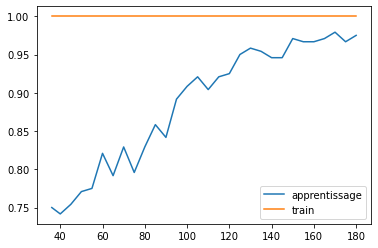

In [92]:
from sklearn.model_selection import learning_curve

N , train_score , val_score = learning_curve(model , X_ru , y_ru , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [87]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [93]:
pred = model.predict(X_test)

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.96      0.96      0.96        28

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.89      0.86      0.87        28

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.82        43
weighted avg       0.84      0.84      0.84        43

